In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
print(data.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
data['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
# data.drop(columns= 'customerID', axis=1, inplace=True)
#convert the datatype of column TotalCharges to numeric type
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [9]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
#Drop the null values 
data.dropna(inplace=True)

# EDA

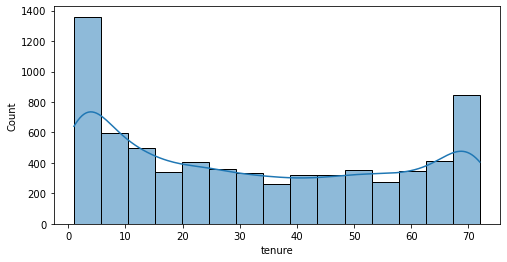

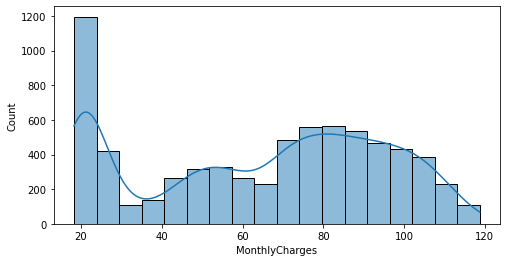

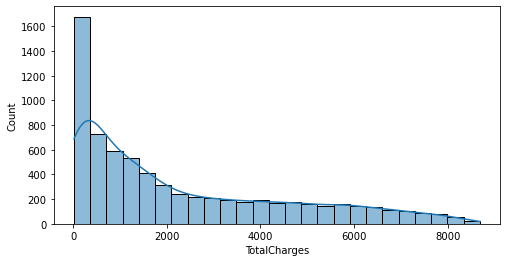

In [11]:
for column in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    plt.figure(figsize=(8,4))
    sns.histplot(data=data, x=column, kde=True)
    plt.show()

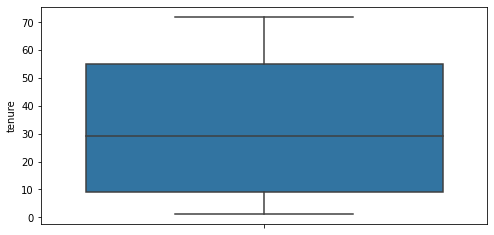

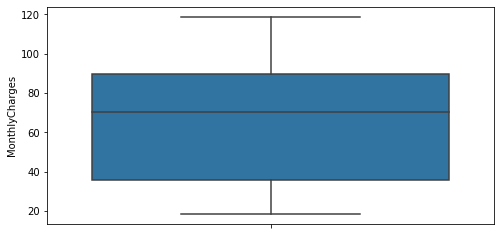

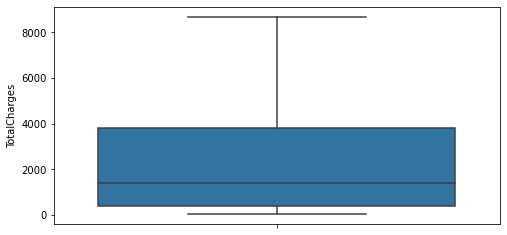

In [12]:
for column in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=data, y=column)
    plt.show()

In [13]:
data['tenure'].dtypes

dtype('int64')

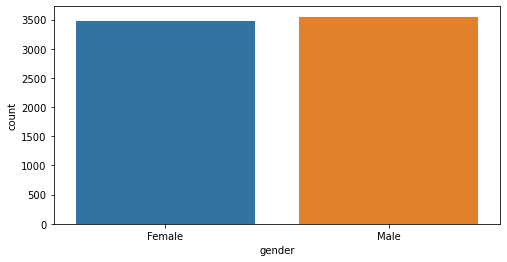

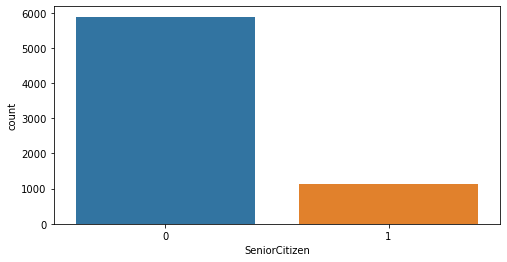

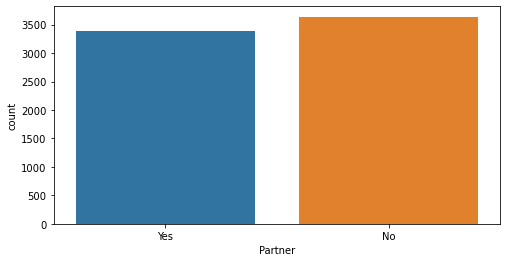

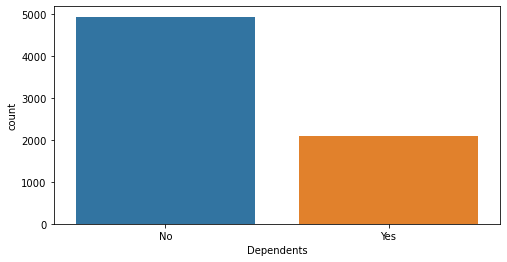

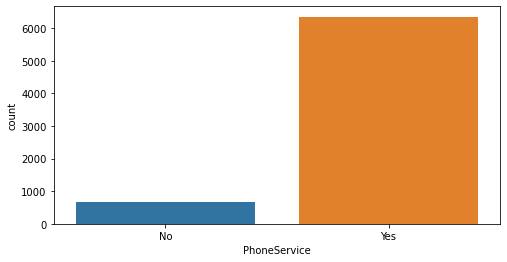

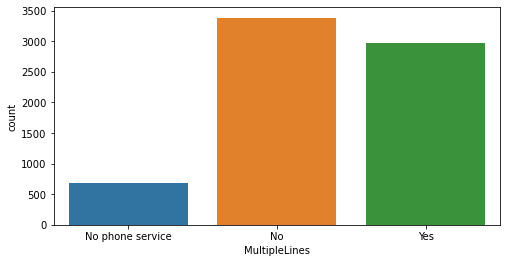

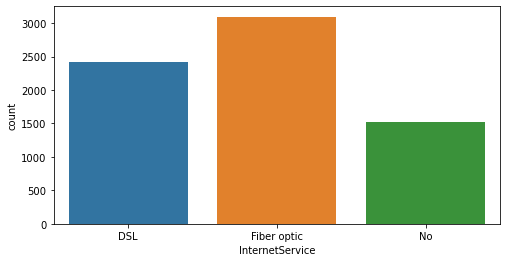

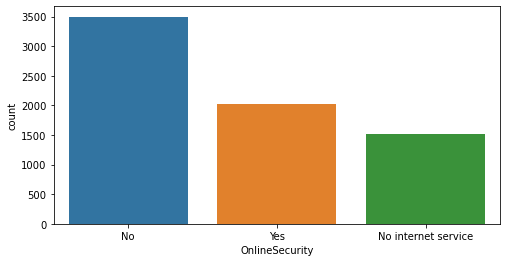

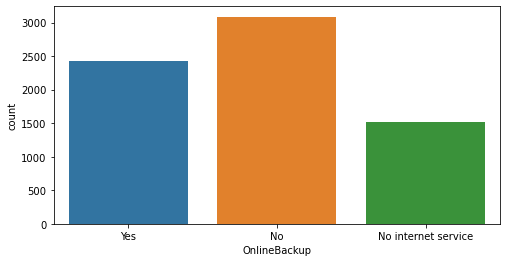

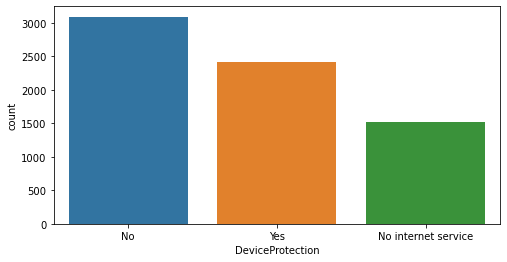

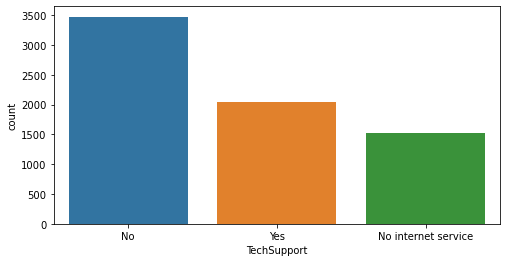

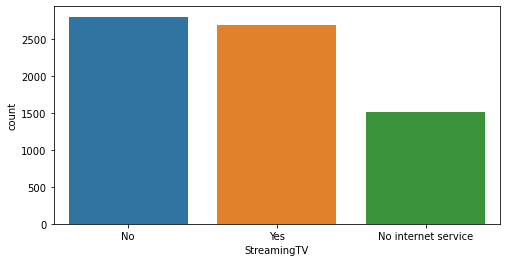

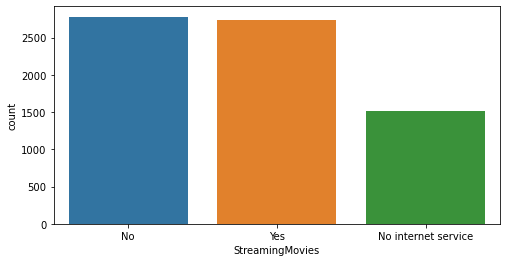

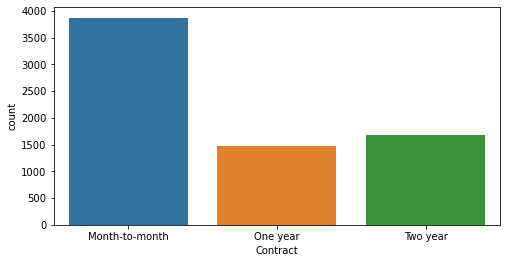

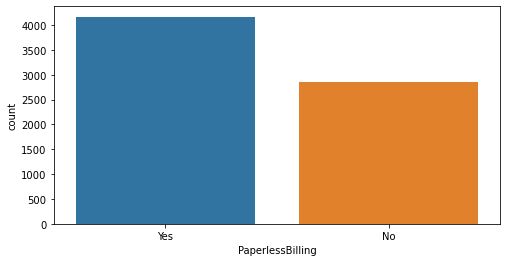

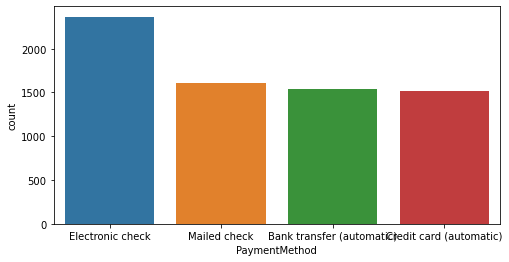

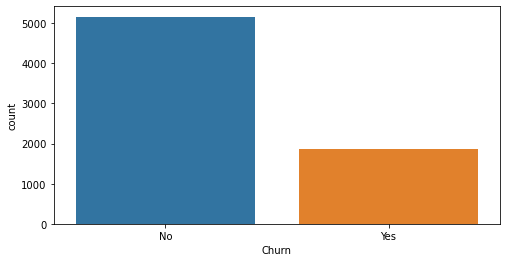

In [14]:
for column in ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
              'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
              'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
              'Churn']:
    plt.figure(figsize=(8,4))
    sns.countplot(data=data, x=column)
    plt.show()

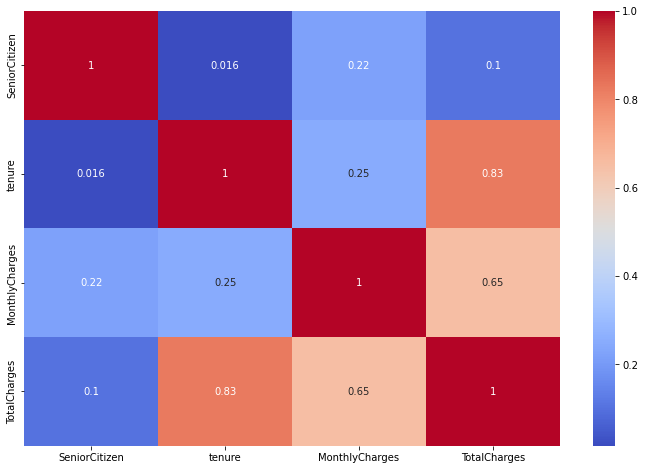

In [15]:
corr_matrix = data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [16]:
# EDA SUMMARY

# Order / Values of features for customer churn cases :
# Categorical Features (Order) :
# gender : Male = Female
# SeniorCitizen : No SeniorCitizen > SeniorCitizen
# Partner : No Partner > Partner
# Dependents : No Dependent > Dependent
# PhoneService : PhoneService > No PhoneService
# MultipleLines : MultipleLines > No MultipleLines > No PhoneService
# InternetService : Fiber Optic > DSL > No InternetService
# OnlineSecurity : Absent > Present > No InternetService
# OnlineBackup : Absent > Present > No InternetService
# DeviceProtection : Absent > Present > No InternetService
# TechSupport : Absent > Present > No InternetService
# StreamingTV : Absent > Present > No InternetService
# StreamingMovies : Absent > Present > No InternetService
# Contract : Month-to-Month > One year > Two year
# PaperlessBilling : Present > Absent
# PaymentMethod : Electronic check > Mailed check > Bank Transfer (automatic) > Credit Card (automatic)!
# Numerical Features (Range) :
# tenure : 1 - 5 months
# MonthlyCharges : 65 - 105
# TotalCharges : 0 - 1000
# According to the EDA, these order / range of values results in customer churn!

## Data Preprocessing 

In [17]:
le = LabelEncoder()
data = data.apply(LabelEncoder().fit_transform)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,2,142,74,0
1,3953,1,0,0,0,33,1,0,0,2,...,2,0,0,0,1,0,3,497,3624,0
2,2558,1,0,0,0,1,1,0,0,2,...,0,0,0,0,0,1,3,435,536,1
3,5524,1,0,0,0,44,0,1,0,2,...,2,2,0,0,1,0,0,266,3570,0
4,6500,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,1,2,728,674,1


In [18]:
data = data.drop(['customerID'], axis=1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,33,1,0,0,2,0,2,0,0,0,1,0,3,497,3624,0
2,1,0,0,0,1,1,0,0,2,2,0,0,0,0,0,1,3,435,536,1
3,1,0,0,0,44,0,1,0,2,0,2,2,0,0,1,0,0,266,3570,0
4,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,728,674,1


# SAMPLING

In [19]:
# churn_counts = df['Churn'].value_counts()
# churn_ratio = churn_counts[0] / churn_counts[1]

# print("The ratio between retained customers and churners is",churn_ratio)

# The ratio between retained customers and churners is 2.7624398073836276
# Since our minority class (churn 1) is 2.76 times smaller than majority class (churn 0) we should consider oversampling 
# the minority class. This problem is called imbalance dataset. This could be done using SMOTE-ENN technique (Synthetic 
# Minority Over-sampling Technique combined with Edited Nearest Neighbors).

# This hybrid sampling technique combines both over-sampling and under-sampling techniques to address the class imbalance 
# problem in binary classification tasks. The SMOTE-ENN technique generates synthetic examples for the minority class and 
# remove noisy examples from the majority class. The SMOTE technique is applied first to over-sample the minority class and 
# generate synthetic examples. Then, the ENN technique is applied to remove noisy examples from the majority class. This 
# results in a balanced dataset with reduced noise and increased number of minority class examples.

# The dataset is unbalanced in a near about 3 : 1 ratio for Not-Churn : Churn customers!
# Due to this, predictions will be biased towards Not-Churn customers.
# Visualizations will also display this bias!

In [20]:
from sklearn.model_selection import train_test_split

X = data.drop('Churn', axis = 1)
y = data['Churn']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

# FEATURE SCALING

In [22]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.fit_transform(X_test)

# MODEL BUILDING

In [37]:
# Evaluate the LDA model
def evaluate_model(X_test, y_test, model):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return [accuracy, cm]

## 1. Linear Discriminant Analysis 

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score

lda = LinearDiscriminantAnalysis()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

accuracy, cm = evaluate_model(X_test, y_test, lda)
print(accuracy)
print(cm)

0.795260663507109
[[1398  151]
 [ 281  280]]


## 2. XG Boost

In [42]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

accuracy, cm = evaluate_model(X_test, y_test, xgb)
print(accuracy)
print(cm)

0.7943127962085308
[[1416  133]
 [ 301  260]]


## 3. Support Vector Machines 

In [57]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear', random_state = 42)
svm.fit(X_train, y_train)

accuracy, cm = evaluate_model(X_test, y_test, svm)
print(accuracy)
print(cm)

0.7933649289099526
[[1427  122]
 [ 314  247]]


## 4. AdaBoost Classifier

In [58]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

accuracy, cm = evaluate_model(X_test, y_test, ada)
print(accuracy)
print(cm)

0.7938388625592417
[[1416  133]
 [ 302  259]]


## 5. Neural Networks 

## 6. Self-Organizing Maps 

## 7. Label Propagation 

In [78]:
from sklearn.semi_supervised import LabelPropagation

lp = LabelPropagation(kernel='knn', n_neighbors=10, max_iter=1000, tol=0.001)
lp.fit(X_train, y_train)

accuracy, cm = evaluate_model(X_test, y_test, lp)
print(accuracy)
print(cm)

0.7928909952606635
[[1416  133]
 [ 304  257]]


## 8. Naive Bayes 



In [59]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

accuracy, cm = evaluate_model(X_test, y_test, nb)
print(accuracy)
print(cm)

0.79478672985782
[[1402  147]
 [ 286  275]]


## 9.	K-Nearest Neighbor 


In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

accuracy, cm = evaluate_model(X_test, y_test, knn)
print(accuracy)
print(cm)

0.7734597156398104
[[1349  200]
 [ 278  283]]


## 10.	Random Forest 

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

accuracy, cm = evaluate_model(X_test, y_test, rf)
print(accuracy)
print(cm)

0.7360189573459716
[[1270  279]
 [ 278  283]]


## 11.	Decision Trees 

In [67]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

accuracy, cm = evaluate_model(X_test, y_test, dt)
print(accuracy)
print(cm)

0.7369668246445498
[[1273  276]
 [ 279  282]]


## 12.	K-means Clustering 

## 13.	Logistic Regression 


In [68]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

accuracy, cm = evaluate_model(X_test, y_test, lr)
print(accuracy)
print(cm)

0.795260663507109
[[1419  130]
 [ 302  259]]


## 14.	Bagging Classifier 

In [76]:
from sklearn.ensemble import BaggingClassifier

dt = DecisionTreeClassifier()
bg = BaggingClassifier(dt, n_estimators=500, max_samples=100, bootstrap=True, random_state=1)
bg.fit(X_train, y_train)

accuracy, cm = evaluate_model(X_test, y_test, bg)
print(accuracy)
print(cm)

0.795260663507109
[[1390  159]
 [ 273  288]]


## 15.	Hierarchical Clustering